# Aufgabe 3: Gaußfilter
Anstatt wie in der vorigen Aufgabe an einer ausgewählten Frequenz hart abzuschneiden, kann mittels eines Faktors
\begin{align}
 h(u,v) = \mathrm{e}^{-\frac{D^2(u,v)}{2\sigma^2}},\qquad h \in [0;1]
\end{align}
auch ein weicher Übergang erzeugt werden.

Verwenden Sie eine Gauß-Glocke für die Hoch- und Tiefpassfilterung und berechnen Sie den Faktor $h$ in Abhängigkeit von der Entfernung $D(u,v)$ zum Ursprung!
Führen Sie die Transformationen ansonsten wie in Teilaufgabe 2 durch! Die Varianz $\sigma$ der Gauß-Glocke ist mit dem dort gegebenen Radius gleichzusetzen.
Was ändert sich in den Ausgabebildern im Vergleich zu Teilaufgabe 2?

## 0. Pfade, Pakete etc.

In [210]:
import glob
import imageio
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

In [211]:
image_filter = 'Bilder/*.jpg'

## 1. Definition des Filters

Übernehmen Sie hier zu Vergleichszwecken Ihre Definition des idealen Hoch- und Tiefpass-Filters aus der vorigen Aufgabe:

In [212]:
D0 = 20
lowpass_filter = lambda D: D <= D0
highpass_filter = lambda D: D >= D0

Definieren Sie den Gauß-Filter als Funktion des Radius $D$ und der Konstante $\sigma$:

In [213]:
sigma = 20
gauss_lowpass = lambda D: np.exp(- D**2 / (2 * sigma**2))
gauss_highpass = lambda D: 1 - np.exp(- D**2 / (2 * sigma**2))

## 2. Laden und Normalisieren des Bildes

In [214]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

In [215]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

## 3. Berechnung der Fouriertransformation
Setzen Sie hier ihre Lösung aus der vorigen Aufgabe ein:

In [216]:
image_transformed = np.fft.fft2(image)
image_transformed = np.fft.fftshift(image_transformed)

## 4. Filterung

Setzen Sie hier ihre Lösung `ex3_filter_spectrum` aus der vorigen Aufgabe ein:

In [217]:
def ex3_filter_spectrum(spectrum, radial_filter):
    y_mid = spectrum.shape[0] / 2
    x_mid = spectrum.shape[1] / 2
    distance = lambda x, y: np.sqrt((x - x_mid)**2 + (y - y_mid)**2)
    passing = np.fromfunction(lambda y, x: radial_filter(distance(x, y)), spectrum.shape)
    spectrum = spectrum * passing
    return spectrum


Das transformierte Bild (Spektrum) wird nun gefiltert:

In [218]:
image_transformed_lowpass = ex3_filter_spectrum(image_transformed, lowpass_filter)
image_transformed_highpass = ex3_filter_spectrum(image_transformed, highpass_filter)
image_transformed_gauss_lowpass = ex3_filter_spectrum(image_transformed, gauss_lowpass)
image_transformed_gauss_highpass = ex3_filter_spectrum(image_transformed, gauss_highpass)

## 5. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [219]:
image_transformed_lowpass = np.fft.ifft2(np.fft.ifftshift(image_transformed_lowpass)).real
image_transformed_highpass = np.fft.ifft2(np.fft.ifftshift(image_transformed_highpass)).real
image_transformed_gauss_lowpass = np.fft.ifft2(np.fft.ifftshift(image_transformed_gauss_lowpass)).real
image_transformed_gauss_highpass = np.fft.ifft2(np.fft.ifftshift(image_transformed_gauss_highpass)).real

Vergleichen Sie nun die Ergebnisses des idealen Hoch- und Tiefpassfilters mit den Gauß-Filtern:

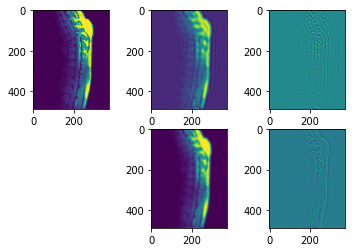

In [220]:
plt.subplot(231)
plt.imshow(image)
plt.subplot(232)
plt.imshow(image_transformed_lowpass)
plt.subplot(233)
plt.imshow(image_transformed_highpass)
plt.subplot(235)
plt.imshow(image_transformed_gauss_lowpass)
plt.subplot(236)
plt.imshow(image_transformed_gauss_highpass)
plt.show()

### Welche Unterschiede lassen sich im Vergleich zu Aufgabe 2 feststellen?

Die "Wellen", die durch die idealen Filter entstehen, sind mit Gauß nicht zu erkennen.